In [1]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [1]:
import import_ipynb
import soundfile as sf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from mydct import mydct
from compress import compress
from decompress import decompress
from audio_save import audio_save
from visualize_time_frequency import visualize_time_frequency
from compress_with_windowing import compress_with_windowing
from decompress_with_windowing import decompress_with_windowing
from save_to_disk import save_to_disk
from load_from_disk import load_from_disk

importing Jupyter notebook from mydct.ipynb
importing Jupyter notebook from compress.ipynb
importing Jupyter notebook from decompress.ipynb
importing Jupyter notebook from audio_save.ipynb
importing Jupyter notebook from visualize_time_frequency.ipynb
importing Jupyter notebook from compress_with_windowing.ipynb
importing Jupyter notebook from decompress_with_windowing.ipynb
importing Jupyter notebook from save_to_disk.ipynb
importing Jupyter notebook from load_from_disk.ipynb


# Exercise 2

The MP3 audio coding format is one of the most popular audio formats used today. It is mainly used to compress audio files in order to allow efficient storing and sending. The compression method used by MP3 is lossy, i.e., some parts of the original audio signal are removed and cannot be restored. The main idea behind this compression method is to remove frequencies, which are not audible, e.g. frequencies that are outside the frequency band detectable by our ears or frequencies that are masked by other louder frequencies.

At the heart of the MP3 compression method lies the discrete cosine transform (DCT), which is a special case of the discrete Fourier transform (DFT). There are four types of DCT, but the second type (DCT-II) is commonly referred to as "the" DCT, and is defined as:

$X\left[ k\right] = \sum_{n=0}^{N-1}x\left[ n\right]\cos\left[\frac{\pi}{N}\left(n+\frac{1}{2}\right)k\right]\nonumber.$

The MP3 compression method does not directly use the DCT-II, but rather a modified version of it, which allows overlapping signal windows. For this exercise we will restrict ourselves to the DCT-II and use it as a rudimentary approximation of the MP3 compression method.

<b>Task 1.</b> In the first task, we want to derive the discrete cosine transform (DCT) - in particular the second version, DCT-II - from the discrete Fourier transform (DFT). 

As seen in the lecture, the discrete Fourirer transform (DFT) is given by:

\begin{equation}
X\left[ k\right] = \sum_{n=0}^{N-1}x\left[ n\right]e^{-jk\frac{2\pi\cdot n}{N}}
\end{equation}

The second discrete cosine transform (DCT-II) is defined as:

\begin{equation}
X\left[ k\right] = \sum_{n=0}^{N-1}x\left[ n\right]\cos\left[\frac{\pi}{N}\left(n+\frac{1}{2}\right)k\right].
\end{equation}

<b>(a)</b> Formally derive the expression for the DCT-II from the DFT and state all the assumptions that you make. It is sufficient to provide a dependency of DCT-II coefficients on the DFT ones, but not necessarily the DFT of the original time domain signal. The DCT-II coefficients can depend on the DFT spectrum of a signal that was obtained by modifying the original one in time domain. 

<b>Solution</b>:
Assumptions:
- The input is real and periodic with period N
- The input signal is defined over the interval [0, N-1]
- For real valued signal the following holds $X\left[ N - k\right] = X^*\left[ k\right]$
- From the definition of the DCT-II we know that all DCT coefficients are real-valued

\begin{equation}
X_{DCT}[k] = \frac{1}{2} \left ( X_{DFT}^*\left[ \frac{k}{2} \right] \cdot e^{jk\frac{\pi}{2N}} + X_{DFT}\left [ \frac{k}{2} \right ] \cdot e^{-jk\frac{\pi}{2N}} \right ) 
\end{equation}

<b>(b)</b> Describe in a few sentences how the DCT can be computed using the DFT, i.e., provide some insight to the formal derivations in (a).

*Note* : For more information you can refer to https://en.wikipedia.org/wiki/MP3

<b>Solution:</b>
So we use the euler identity to describe the cosine function with complex exponentials. The reason why divide k by 2 is due to the assumption that we are working with real-valued signals - for which the following is true: $X\left[ N - k\right] = X^*\left[ k\right]$. Since all DCT coefficients are real valued we can say that $X[k]$ is symmetric. So everything that comes after $N/2$ is going to be a repetition. The phase shift is applied to get the desired cosine expression that we also have above. This does not affect the magnitude.

<b>Task 2.</b>  Based on the results from Task 1, implement your own DCT function. Use the native Python function **fft** and follow the steps you detailed in Task 1, to compute the DCT.

*Note* : Naively implementing the DCT function, i.e., using two for-loops, will result in an execution time of several hours for the provided audio file. Use an even extension of the original signal in order to extend the signal length from $N$ to $2N$.

<b>(a) </b> Implement your own DCT, in **mydct**. Using the native Python function **dct** in your code will result in zero points!

<b>(b) </b> Comparing the results of your implementation with the ones of the native Python function **dct**, you will notice differences in the obtained frequency coefficients. Determine the normalization constants used by Python and store it in **normalization_constant**. Make sure your final **mydct** function outputs normalized coefficients.

*Note*: Use the code in the following cell to test your implementation. You don't need to modify it.

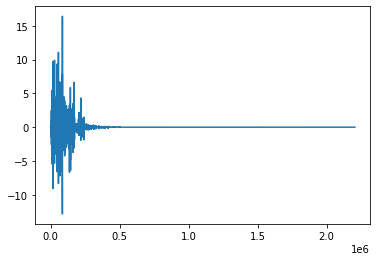

In [2]:
# Open audio file
x, Fs = sf.read('audio/Pete_Murphy_Aside.flac')
# Left and right channel
x_lc = x[:,0]
x_rc = x[:,1]
# Implement mydct and test it here
X_rc = mydct(x_rc)
plt.plot(X_rc)
plt.show()

<b>Task 3.</b> You are provided with an uncompressed audio file *Pete_Murphy_Aside.flac*, containing two audio channels - left and right. Your task is to compress the audio file in a MP3-like manner with the goal of reaching a high compression rate, while maintaining a high audio quality.

*Note* : Reading the audio file and separating the two channels has already been implemented in Task 2. 

<b>(a) </b> Implement the **compress** function which computes the DCT and compresses the signal by removing unnecessary frequencies. Use **n\_comp** to specify the number of frequencies to keep. What happens if you vary **n_comp**? Plot the frequencies that you keep after the compression in order to get some intuition.

*Note* : You may use the native Python function **dct**.

<b>The bigger n_comp is the more frequencies are kept in X_lc, which results in much more detail than with low n_comp values.</b>

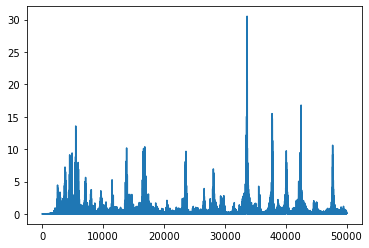

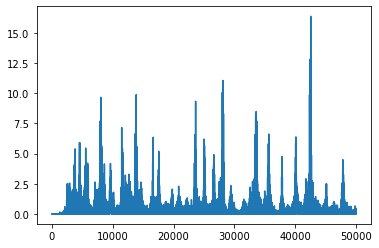

50000


In [3]:
# Compress the audio
n_comp = 50000

X_lc, X_rc, i_lc, i_rc = compress(x_lc, x_rc, n_comp)
k = np.arange(0,len(X_lc))
plt.plot(abs(X_lc))
plt.show()
plt.plot(abs(X_rc))
plt.show()
print(len(X_lc))

<b>(b) </b> Implement the **decompress** function which transforms the compressed frequency domain signal back to the time domain. Despite not being able to recover the discarded frequencies, the time domain signal must have the same length **N** as the original one. You may use the Python native function **idct** for the inverse transform. 

*Hint* : There are some additional variables from the **compress** function that you need to define by yourself in order to successfully implement the **decompress** function. Refer to the function definition for more information. 

*Note* : You can play your compressed and uncompressed audio signals using a media player (e.g. VLC Media Player). 

In [4]:
# Decompress the audio
N = len(x_lc)
y_lc, y_rc = decompress(X_lc, X_rc, i_lc, i_rc, N);
audio_save("decompressed", y_lc, y_rc, Fs)

*Note*: Use the function implemented in the following cell to visualize a time-frequency plot of the audio signal. You don't need to modify it. Notice that the frequencies with high energy are time-dependent, hence the frequencies carrying the most information are not exactly the same at any two time instances.

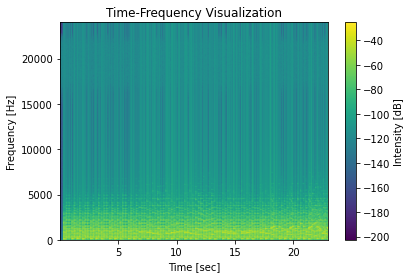

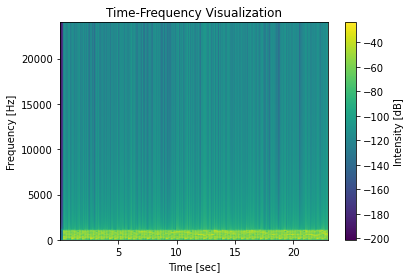

In [5]:
visualize_time_frequency(x_lc, Fs);
visualize_time_frequency(y_lc, Fs);

<b>(c) </b> In order to account for time varying frequency intensities as seen in the previous figures, one can apply a window function. *Windowing* involves multiplying the timesteps of a signal by a window function of finite length whose amplitude varies smoothly and gradually towards zero at the edges. This allows to keep certain frequencies, while others are discarded.

Your task it to modify the original **compress** function to allow windowing of the audio signal. Start by defining a suitable window size **win\_size**. The number of implemented windows **num\_win** is determined such that at each timestep, only one of the windows is applied. Choose the number of components to keep **n\_comp** to be 10% of **win\_size**. For every window in **num\_win**, you need to determine which **n\_comp** of the original signal you want to keep. What is a suitable criteria to determine which frequency components to keep? Implement your solution in the **compress\_with\_windowing** function. 

The output of **compress\_with\_windowing** includes:

1) **X_lc** and **X_rc**: the frequency channels that you keep after the compression of size **n\_comp** x **num\_win** + 1

2) **i\_lc** and **i\_rc**: the corresponding indices of the original frequencies


*Note* : Make sure that you take care of the last window, meaning the last part of the audio signal which doesn't fill a whole window. Any **win\_size** that yields a suitable compressed signal can be used for this task. You may use the native Python function **dct**.

*Hint* : Use a rectangular window function. 

In [6]:
win_size = 10000
n_comp = int(win_size*0.1)
X_lc_win, X_rc_win, a_lc_win, a_rc_win = compress_with_windowing(x_lc, x_rc, n_comp, win_size)

KeyboardInterrupt: 

<b>(d) </b> Following your implementation in (c), we now want to decompress the signal which was previously compressed with windowing. We can use the indices of the original frequencies along with the frequency channels of the compressed signal to reconstruct the original signal. Implement your solution in the **decompress\_with\_windowing** function. Your output includes the reconstruced (decompressed) signal in time domain. 

*Note* : You may use the native Python function **idct**. However you should apply it to the array for each individual window, and not to the entire matrix containing all of the windows directly. 

In [ ]:
y_lc_win, y_rc_win = decompress_with_windowing(X_lc_win, X_rc_win, a_lc_win, a_rc_win, N, win_size)
plt.plot(y_lc_win)
plt.show()
audio_save("decompressed_with_windowing", y_lc_win, y_rc_win, Fs)

<b>(e) </b> To determine the optimal window size, we try to minimize the error on our reconstructed audio signal in the time domain, i.e. **y_lc_win** and **y_rc_win**. Compare the reconstructed signal with the original signal, **x\_lc** and **x_rc**, using the root mean square. Do this for several window sizes and plot the error. As in the previous tasks, set **n\_comp** to 10\% of the window size for all your tries. What do you observe when you increase the window size? Can you find a global optimum? 

Write an optimizer loop that searches for the optimal window size. Limit your search to window sizes smaller than 70000. A grid with 50 tries should be sufficient for your solution. Indicate the optimal window size in your plot and state the value in the title of the plot.

In [ ]:
opt_win_size=0

<b>(f) </b> Having an optimal window size, try to compress the signal to achieve a small file size while maintaining good audio quality. Use **save\_to\_disk** to save your frequency domain signal to a json file. Use the root mean square error assess the audio quality. In the end, you have to submit one compressed *audio.json* file.

*Note* : Use the window size you determined in (e). If you failed to solve the previous task, use any reasonable window size. 

*Note*: The code in the following cell loads your generated *audio.json* and decompresses it to reconstruct the original signal. The decompressed signal is then stored as an *audio.flac* file. Use the code in the following cell to test your implementation. You don't need to modify it.

In [ ]:
# Load json file
X_lc, X_rc, i_lc, i_rc = load_from_disk('audio')
N = len(x_lc)
y_lc, y_rc = decompress_with_windowing(X_lc, X_rc, i_lc, i_rc, N, win_size)

# Save flac file 
audio_save('audio',y_lc,y_rc,Fs)